In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [83]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

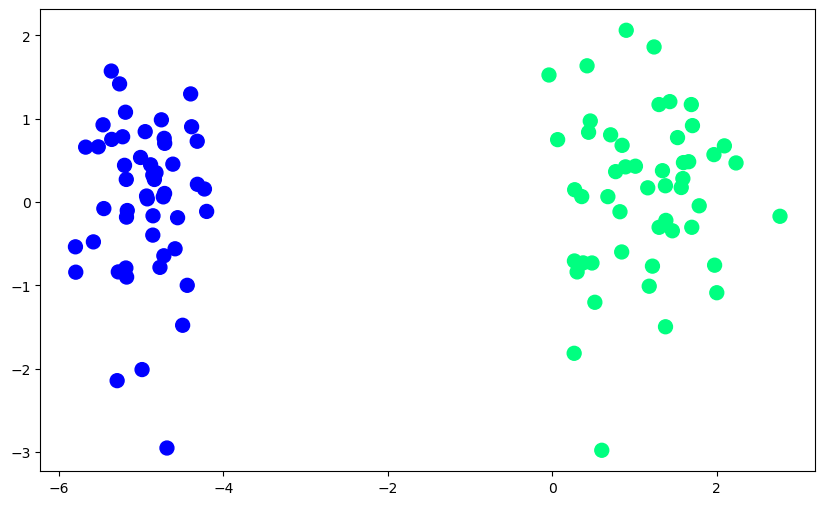

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [85]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [86]:
class MyPerception:

    def __init__(self,lr,epoch):
        self.lr = lr
        self.epoch = epoch
        self.m = None
        self.b = None

    def step(self,n):
        return 1 if n>0 else 0

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        w = np.ones(x_train.shape[1])

        for i in range(self.epoch):
            j = np.random.randint(0,x_train.shape[0])
            y_hat = self.step(np.dot(x_train[j],w))
            w += self.lr*(y_train[j]-y_hat)*x_train[j]
        
        intercept = w[0]
        coef = w[1:]
        self.m = -(coef[0]/coef[1])
        self.b = -(intercept/coef[1])
        print(self.b,self.m)
    
    def predict(self,x_test):
        return np.dot(self.m,x_test)+self.b

In [87]:
mp = MyPerception(0.1,100)
mp.fit(x,y)

-3.8395687654294357 -3.2886048105173025


In [88]:
x_input = np.linspace(-3,3,100)
y_input = mp.m*x_input + mp.b

In [89]:
class MySigmoidPerception:

    def __init__(self,lr,epoch):
        self.lr = lr
        self.epoch = epoch
        self.m = None
        self.b = None

    def sigmoid(self,n):
        return 1/(1+np.exp(-n))

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        w = np.ones(x_train.shape[1])

        for i in range(self.epoch):
            j = np.random.randint(0,x_train.shape[0])
            y_hat = self.sigmoid(np.dot(x_train[j],w))
            w += self.lr*(y_train[j]-y_hat)*x_train[j]
        
        intercept = w[0]
        coef = w[1:]
        self.m = -(coef[0]/coef[1])
        self.b = -(intercept/coef[1])
        print(self.b,self.m)
    
    def predict(self,x_test):
        return np.dot(self.m,x_test)+self.b

In [90]:
msp = MySigmoidPerception(0.1,1000)
msp.fit(x,y)

-14.683686136393748 -12.900711468466


In [91]:
x_input1 = np.linspace(-3,3,100)
y_input1 = msp.m*x_input1 + msp.b

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [93]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_/lr.coef_[0][1])

In [94]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

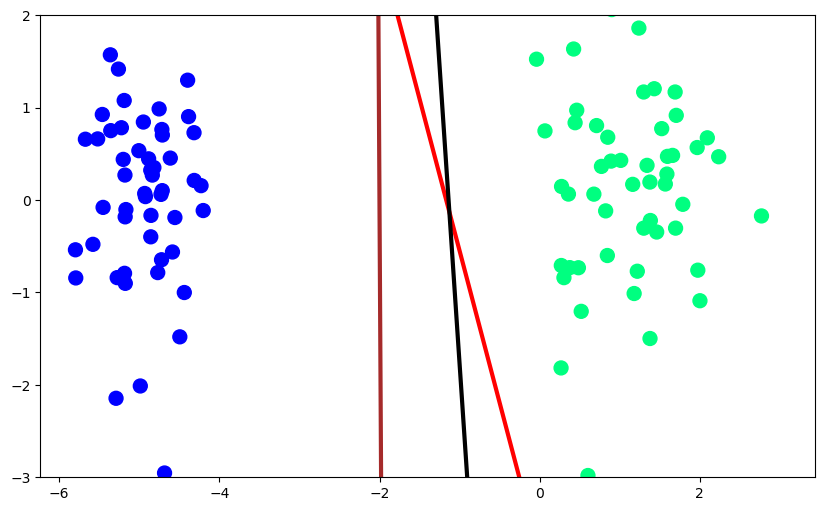

In [95]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)